In [1]:
# ZNE example 2

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_ibm_runtime import EstimatorV2 as estimator

from qemlib.zne import ZeroNoiseExtrapolator
from qemlib.zne import EstimatorExecutor
from qemlib.zne import plot_zne

SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j])


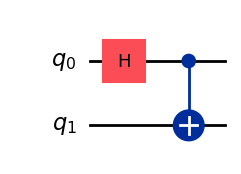

In [2]:
# 1. Build a simple circuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Observable: ZZ
observable = SparsePauliOp.from_list([("ZZ", 1.0)])
print(observable)
qc.draw('mpl')

In [3]:
# 2. Create noisy backend

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 1), ["h"])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ["cx"])

backend = AerSimulator(noise_model=noise_model)

In [4]:
# 3. Executor

executor = EstimatorExecutor(backend=backend, observable=observable, shots=50_000)

In [5]:
# 4. ZNE workflow

zne = ZeroNoiseExtrapolator(scales=[1, 3, 5], extrapolation_method="linear")

result = zne.run(qc, executor)

print("Noise scales:", result["scales"])
print("Noisy values:", result["values"])
print("ZNE value:", result["zne_value"])


Noise scales: [1 3 5]
Noisy values: [0.9502  0.85772 0.77184]
ZNE value: 0.9936899999999994


/usr/local/lib/python3.12/dist-packages/qemlib/zne/models.py:52: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(quadratic_model, xdata, ydata)


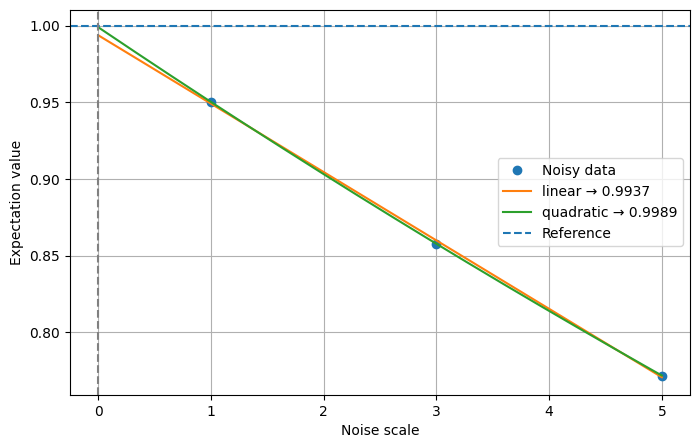

In [6]:
# 5. Plot

plot_zne(
    result["scales"],
    result["values"],
    ref_value = 1,
    methods=("linear", "quadratic"),
)
